## 所需要的package
**json**<br/>
Python Json library. 用来对于Json格式的处理<br/><br/>

**requests**<br/>
Python HTTP library. 用来做API调用<br/><br/>
**pandas**<br/>
Python data analysis library<br/><br/>
**matplotlib**<br/>
Python plotting library

In [3]:
import json
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
%matplotlib inline

## Load JSON from file
Python has an in-built package called json that can help us handle JSON easily. But
before we use any functions from json package we’ll have to import the package into
our project. This can be done easily by calling import json at the beginning of
weather_forecast.py .

In [4]:
weather_file=open("sample.json", encoding='utf-8')
weather_data=json.load(weather_file)
weather_file.close()

In [5]:
print(weather_data)

{'latitude': 42.3601, 'longitude': -71.0589, 'timezone': 'America/New_York', 'offset': -5, 'currently': {'time': 1486005364, 'summary': 'Mostly Cloudy', 'icon': 'partly-cloudy-night', 'nearestStormDistance': 27, 'nearestStormBearing': 182, 'precipIntensity': 0, 'precipProbability': 0, 'temperature': 35.28, 'apparentTemperature': 31.04, 'dewPoint': 25.17, 'humidity': 0.66, 'windSpeed': 4.87, 'windBearing': 275, 'visibility': 9.99, 'cloudCover': 0.64, 'pressure': 1014.05, 'ozone': 378.1}, 'minutely': {'summary': 'Mostly cloudy for the hour.', 'icon': 'partly-cloudy-night', 'data': [{'time': 1486005360, 'precipIntensity': 0, 'precipProbability': 0}, {'time': 1486005420, 'precipIntensity': 0, 'precipProbability': 0}, {'time': 1486005480, 'precipIntensity': 0, 'precipProbability': 0}, {'time': 1486005540, 'precipIntensity': 0, 'precipProbability': 0}, {'time': 1486005600, 'precipIntensity': 0, 'precipProbability': 0}, {'time': 1486005660, 'precipIntensity': 0, 'precipProbability': 0}, {'tim

In [6]:
dark_url = "https://api.darksky.net/forecast/%s/%s,%s?units=si" % ("62bf94de3c232f30f6f3ee5bb534c2f3",
                                                                   37.8267, -122.4233)


In [7]:
dark_response = requests.get(dark_url)
print(dark_response.text)

{"latitude":37.8267,"longitude":-122.4233,"timezone":"America/Los_Angeles","currently":{"time":1540040094,"summary":"Clear","icon":"clear-night","nearestStormDistance":0,"precipIntensity":0,"precipProbability":0,"temperature":13.26,"apparentTemperature":13.26,"dewPoint":7.23,"humidity":0.67,"pressure":1017,"windSpeed":0.55,"windGust":1.59,"windBearing":67,"cloudCover":0.13,"uvIndex":0,"visibility":16.09,"ozone":264.12},"minutely":{"summary":"Clear for the hour.","icon":"clear-night","data":[{"time":1540040040,"precipIntensity":0,"precipProbability":0},{"time":1540040100,"precipIntensity":0,"precipProbability":0},{"time":1540040160,"precipIntensity":0,"precipProbability":0},{"time":1540040220,"precipIntensity":0,"precipProbability":0},{"time":1540040280,"precipIntensity":0,"precipProbability":0},{"time":1540040340,"precipIntensity":0,"precipProbability":0},{"time":1540040400,"precipIntensity":0,"precipProbability":0},{"time":1540040460,"precipIntensity":0,"precipProbability":0},{"time":

In [8]:
dark_data=json.loads(dark_response.text)
print(dark_data)

{'latitude': 37.8267, 'longitude': -122.4233, 'timezone': 'America/Los_Angeles', 'currently': {'time': 1540040094, 'summary': 'Clear', 'icon': 'clear-night', 'nearestStormDistance': 0, 'precipIntensity': 0, 'precipProbability': 0, 'temperature': 13.26, 'apparentTemperature': 13.26, 'dewPoint': 7.23, 'humidity': 0.67, 'pressure': 1017, 'windSpeed': 0.55, 'windGust': 1.59, 'windBearing': 67, 'cloudCover': 0.13, 'uvIndex': 0, 'visibility': 16.09, 'ozone': 264.12}, 'minutely': {'summary': 'Clear for the hour.', 'icon': 'clear-night', 'data': [{'time': 1540040040, 'precipIntensity': 0, 'precipProbability': 0}, {'time': 1540040100, 'precipIntensity': 0, 'precipProbability': 0}, {'time': 1540040160, 'precipIntensity': 0, 'precipProbability': 0}, {'time': 1540040220, 'precipIntensity': 0, 'precipProbability': 0}, {'time': 1540040280, 'precipIntensity': 0, 'precipProbability': 0}, {'time': 1540040340, 'precipIntensity': 0, 'precipProbability': 0}, {'time': 1540040400, 'precipIntensity': 0, 'pre

In [9]:
print(dark_data["daily"]["data"][0]["temperatureMin"])
print(dark_data["daily"]["data"][0]["temperatureMax"])
print(dark_data["daily"]["data"][0]["humidity"])
print(dark_data["daily"]["data"][0]["summary"])

12.89
20.53
0.68
Partly cloudy overnight.


## 我们需要什么样操作？

- STEP1: 取回数据 Extract
- STEP2: 转换数据，提取所需要的信息， Transform
- STEP3: 放入需要处理的数据结构, Load

因此所需函数及输入输出
```python
def get_daily_data(remote=False)

def request_data():
    return json.loads(response.text)

def daily_data_of_attributes(json_dict, attributes):
    daily_attributes = {}
    return daily_attributes
```

## 放在一起

In [4]:
def load_json_sample(path):#本地
    with open(path, encoding='utf-8') as json_file:
        return json.load(json_file)

In [5]:
def daily_data_of_attributes(json_dict, attributes):
    daily_attributes = {}
    for attr in attributes:
        daily_attributes[attr] = []
    daily_data = json_dict["daily"]["data"]
    try:
        for dict_data in daily_data:
            for attr in attributes:
                daily_attributes[attr].append(dict_data[attr])
    except KeyError:
        print("Key Not Found")
        return {}
    return daily_attributes

In [6]:
def request_data():#在线
    # LA 37.8267,-122.4233 , beijing 39.904200, 116.407396
    lat = 37.8267
    long = -122.4233
    api_key = "62bf94de3c232f30f6f3ee5bb534c2f3"
    url = "https://api.darksky.net/forecast/%s/%s,%s?units=si" % (api_key, lat, long)
    response = requests.get(url)
    return json.loads(response.text)

In [16]:
def get_daily_data(remote=False):
    if remote:
        json_obj = request_data()#在线
    else:
        json_obj = load_json_sample('sample.json')
#    pretty_print_dict_of_list(json_obj)
    attributes = ['temperatureMin', 'temperatureMax', 'humidity','summary']
    daily_data = daily_data_of_attributes(json_obj, attributes)
    return daily_data

In [11]:
def pretty_print_dict_of_list(d):
    indent = 4
    print("{")
    for k, l in d.items():
        print(indent * " " + k + ": ", end="")
        print(l)
    print("}")

In [9]:
print(daily_data)

{'temperatureMin': [27.83, 29.63, 23.75, 20.23, 23.44, 21.91, 14.81, 35.36], 'temperatureMax': [40.64, 41.4, 32.89, 33.38, 38.55, 37.77, 33.91, 52.52], 'humidity': [0.76, 0.67, 0.6, 0.61, 0.66, 0.58, 0.55, 0.94], 'summary': ['Light snow in the morning.', 'Partly cloudy until evening.', 'Partly cloudy starting in the afternoon, continuing until evening.', 'Partly cloudy starting in the afternoon, continuing until evening.', 'Drizzle overnight.', 'Partly cloudy until afternoon.', 'Mixed precipitation starting in the evening.', 'Rain in the morning and evening.']}


In [8]:
daily_data = get_daily_data(False)

In [12]:
pretty_print_dict_of_list(daily_data)

{
    temperatureMin: [27.83, 29.63, 23.75, 20.23, 23.44, 21.91, 14.81, 35.36]
    temperatureMax: [40.64, 41.4, 32.89, 33.38, 38.55, 37.77, 33.91, 52.52]
    humidity: [0.76, 0.67, 0.6, 0.61, 0.66, 0.58, 0.55, 0.94]
    summary: ['Light snow in the morning.', 'Partly cloudy until evening.', 'Partly cloudy starting in the afternoon, continuing until evening.', 'Partly cloudy starting in the afternoon, continuing until evening.', 'Drizzle overnight.', 'Partly cloudy until afternoon.', 'Mixed precipitation starting in the evening.', 'Rain in the morning and evening.']
}


In [19]:
df = pd.DataFrame(daily_data)
print(df)

   temperatureMin  temperatureMax  humidity  \
0           27.83           40.64      0.76   
1           29.63           41.40      0.67   
2           23.75           32.89      0.60   
3           20.23           33.38      0.61   
4           23.44           38.55      0.66   
5           21.91           37.77      0.58   
6           14.81           33.91      0.55   
7           35.36           52.52      0.94   

                                             summary  
0                         Light snow in the morning.  
1                       Partly cloudy until evening.  
2  Partly cloudy starting in the afternoon, conti...  
3  Partly cloudy starting in the afternoon, conti...  
4                                 Drizzle overnight.  
5                     Partly cloudy until afternoon.  
6       Mixed precipitation starting in the evening.  
7                   Rain in the morning and evening.  


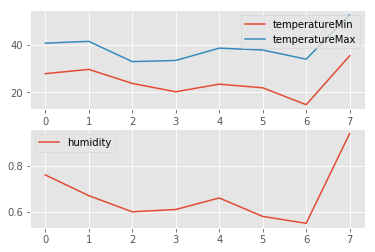

In [14]:
df_temperature = df[["temperatureMin", "temperatureMax"]]
df_humidity = df[["humidity"]]
# Plot data
plt.style.use('ggplot')
_, axes = plt.subplots(nrows=2)
df_temperature.plot(ax=axes[0])
df_humidity.plot(ax=axes[1])
plt.show()

In [ ]:
def next_week_weather():
    daily_dark_data = get_daily_data(True)
    df_dark = pd.DataFrame(daily_dark_data)
    df_dark_temperature = df_dark[["temperatureMin", "temperatureMax"]]
    df_dark_humidity = df_dark[["humidity"]]

    # Plot data
    plt.style.use('ggplot')
    _, axes = plt.subplots(nrows=2)
    df_dark_temperature.plot(ax=axes[0])
    df_dark_humidity.plot(ax=axes[1])
    plt.show()

In [ ]:
next_week_weather()

In [ ]:
import subprocess

In [ ]:
def say(text: str):
    subprocess.call('say ' + text, shell=True)

In [ ]:
say("负0.55")

In [ ]:
highest_temp = max(daily_data["temperatureMax"])
lowest_temp = min(daily_data["temperatureMin"])
report = "下周最高温度 The highest temperature in the coming week will be " \
    + str(highest_temp) + " 度degrees, 最低温度 with the lowest of " + str(lowest_temp) + "度 degrees."
say(report)